In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

# The digits dataset

digits = datasets.load_digits()
for key,value in digits.items() :
    try:
        print(key,value.shape)
    except:
        print(key)

DESCR
images (1797, 8, 8)
data (1797, 64)
target_names (10,)
target (1797,)


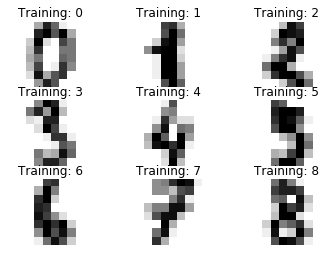

In [12]:
# Take a look!

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:9]):
    plt.subplot(3, 3, index + 1)
    #.subplot(a,b,c),分別代表numrows, numcols, fignum where fignum ranges from 1 to numrows*numcols.
    plt.axis('off')
    #axis代表圖例，off是關閉圖例
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)


In [19]:
#訓練及分類

n_samples = len(digits.images)
# n_samples = 1797

data = digits.images.reshape((n_samples, -1))
# 資料攤平:1797 x 8 x 8 -> 1797 x 64
# 這裏的-1代表自動計算，相當於 (n_samples, 64)

classifier = svm.SVC(gamma=0.001)
# 產生SVC分類器
# SVC之預設kernel function為RBF (radial basis function): $$\exp(-\gamma |x-x'|^2)$$. 
# SVC(gamma=0.001)設定RBF函數裏的$$\gamma$$ 這個值必需要大於零。

classifier.fit(data[:(n_samples / 2)], digits.target[:(n_samples / 2)])
# 用前半部份的資料來訓練

expected = digits.target[n_samples / 2:]
# 真實目標資料存於expected變數

predicted = classifier.predict(data[n_samples / 2:])
# 利用後半部份的資料來測試分類器，共 899筆資料
# 將預測結果存入predicted變數

print(expected[:20])
print(predicted[:20])
# 觀察前20比預測和正確結果比較

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[8 8 4 9 0 8 9 8 1 2 3 4 5 6 7 8 9 0 1 2]
[8 8 4 9 0 8 9 8 1 2 3 4 5 6 7 8 9 0 1 2]


In [20]:
#分類準確度統計
# Statistics
#混淆矩陣
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
# The row is actual class, the colume is predicted class.

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


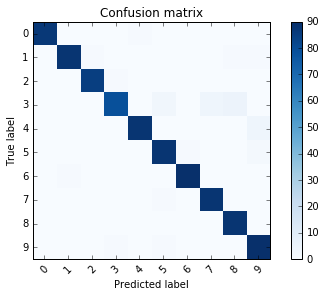

In [21]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    import numpy as np
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    # cmap=plt.cm.Blues
    plt.title(title)
    # title='Confusion matrix'
    plt.colorbar()
    # 顯示數字漸層色塊(右側)
    tick_marks = np.arange(len(digits.target_names))
    # [0 1 2 3 4 5 6 7 8 9]
    
    plt.xticks(tick_marks, digits.target_names, rotation=45)
    plt.yticks(tick_marks, digits.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
plot_confusion_matrix(metrics.confusion_matrix(expected, predicted))

In [22]:
#metrics.classification_report(expected, predicted)，回報概況
print("Classification report for classifier %s:\n%s\n" 
      % (classifier, metrics.classification_report(expected, predicted)))
# 以手寫3為例:
# True Positive(TP):實際為3且判斷為3，共79個，H0
# False Positive(FP):實際不為3但判斷為3，共2個，Type II error
# False Negative(FN):實際為3但判斷不為3，共12個，Type I error
# True Negative(TN):實際不為3且判斷不為3，共885個，H1

# precision = TP/(TP+FP) = 79/81 = 0.98
# 判斷為3且實際為3的比例為0.98
#亂槍打鳥會降低precision
# recall = TP/(TP+FN) = 79/91 = 0.87
# 實際為3且判斷為3的比例為0.87
#多猜幾次可以提高recall
# f1-score= 2 x precision x recall/(recision + recall) = 0.92
# f1-score 則為以上兩者之「harmonic mean 調和平均數」
# support代表著實際為手寫數字的總數。例如實際為3的數字共有91個。

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899




C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


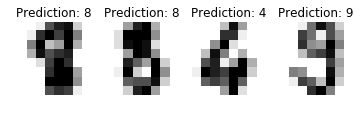

In [23]:
images_and_predictions = list(
                        zip(digits.images[n_samples / 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

In [1]:
images_and_predictions = list(
                        zip(digits.images[n_samples / 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

NameError: name 'digits' is not defined